In [81]:
import numpy as np
np.random.seed(42)

#generate the Xset
a0=0.6       #bias
a1=0.3       #coefficient for variable 1  
a2=0.6       #coefficient for variable 2
#sample 120 values for variable 1 from an uniform distribution
x1=np.random.uniform(-5,5,120)
#sample 120 values for variable 2 from a normal distribution
x2=np.random.normal(-1,1,120)
e=np.random.normal(-0.01,0.01,120)  #error in observation as a gaussian

#create the data matrix to estimate the underlying linear function y=a0+a1*x1+a2*x2
data=np.zeros((120,3))  #create X (data matrix)
data[:,0]=np.ones(120)  # for the bias term
data[:,1]=x1[0:120]
data[:,2]=x2[0:120]

#Generate the observed y values
y=np.zeros(120)
for i in range(120):
    y[i]=a0+a1*x1[i]+a2*x2[i]+e[i]
y=y-np.mean(y)
# g=[]
# for j in y:
#     if j>=0:
#         g.append(1)
#     else:
#         g.append(0)
print(int(np.mean(y)))

#Decision rule for performing classification based on y
# y>=0 : class 1 and y<0: class 2

#First 100 samples are considered to estimate the coefficient: a0,a1,a2
#Remainig 20 samples are test samples
X=data[:100,:]
Y=y[:100]
print("Shape of the independent variable matrix:", X.shape)
print("Shape of the dependent variable vector:",Y.shape)

#Estimate the coefficients
C=np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X)), np.matmul(np.transpose(X),Y))

print("The estimated value are: a0={:.3f}, a1={:.3f} and a2={:.3f}".format(C[0],C[1],C[2]))
print("The actual values are: a0={:.2f}, a1={:.2f} and a2={:.2f}".format(a0,a1,a2))

#Testing:
#Select a random test sample:
x1_test=x1[110]
x2_test=x2[110]
#estimate y for (x1,x2)
y_test=C[0]+C[1]*x1_test+C[2]*x2_test
print(f"The observed and estimated values are {y[110] :.3f} and {y_test :.3f} respectively")


#Classification using y_test; only for demo 0 is shown as threshold 
if y_test>=0: 
    print("Class 1")
else:
    print("Class 2")


0
Shape of the independent variable matrix: (100, 3)
Shape of the dependent variable vector: (100,)
The estimated value are: a0=0.631, a1=0.299 and a2=0.601
The actual values are: a0=0.60, a1=0.30 and a2=0.60
The observed and estimated values are 0.041 and 0.052 respectively
Class 1


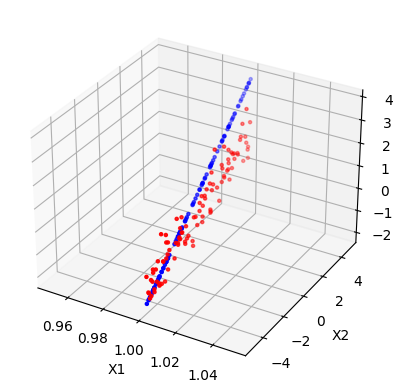

In [82]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

Y_pred=np.zeros(100)
for i in range(100):
    Y_pred[i]=C[0]+C[1]*X[i,0]+C[2]*X[i,1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:100,0], X[:100,1], Y, marker='.', color='red')
ax.scatter(X[:100,0], X[:100,1], Y_pred, marker='.', color='blue')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Y")
plt.show()